<a href="https://colab.research.google.com/github/thugge254/From-Wikipedia-to-Insights-2024-Olympics-Medal-Data/blob/main/web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## From Wikipedia to Insights: 2024 Olympics Medal Data

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import plotly.express as px
import squarify

### Scrap The Olmpics Data

In [8]:
url = "https://en.wikipedia.org/wiki/2024_Summer_Olympics_medal_table"
tables = pd.read_html(url)
medal_table = tables[3]

In [9]:
# Remove last row (Totals)
df_new = medal_table.iloc[:-1].copy()

In [10]:
for col in df_new.columns:
  print (col)

Rank
NOC
Gold
Silver
Bronze
Total


In [12]:
# Convert columns to numeric
df_new["Total"] = pd.to_numeric(df_new["Total"], errors="coerce")
df_new["Rank"] = pd.to_numeric(df_new["Rank"], errors="coerce")
print(df_new.head())

   Rank             NOC  Gold  Silver  Bronze  Total
0   1.0  United States‡    40      44      42    126
1   2.0           China    40      27      24     91
2   3.0           Japan    20      12      13     45
3   4.0       Australia    18      19      16     53
4   5.0         France*    16      26      22     64


### Top 10 10 Countries by Gold medal

In [13]:
top10_gold = df_new.sort_values(by="Gold", ascending=False).head(10)
print(top10_gold)

   Rank             NOC  Gold  Silver  Bronze  Total
0   1.0  United States‡    40      44      42    126
1   2.0           China    40      27      24     91
2   3.0           Japan    20      12      13     45
3   4.0       Australia    18      19      16     53
4   5.0         France*    16      26      22     64
5   6.0     Netherlands    15       7      12     34
6   7.0   Great Britain    14      22      29     65
7   8.0     South Korea    13       9      10     32
8   9.0           Italy    12      13      15     40
9  10.0         Germany    12      13       8     33


##### Horizontal bar chart

/tmp/ipython-input-1554477098.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


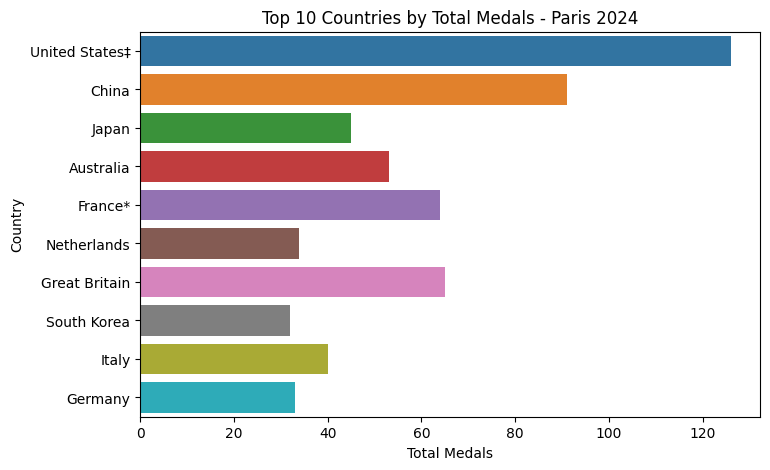

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=top10_gold,
    x="Total",
    y="NOC",
    palette="tab10"
)
plt.title("Top 10 Countries by Total Medals - Paris 2024")
plt.xlabel("Total Medals")
plt.ylabel("Country")
plt.show()

####  Top 5 Countries by Gold Medal

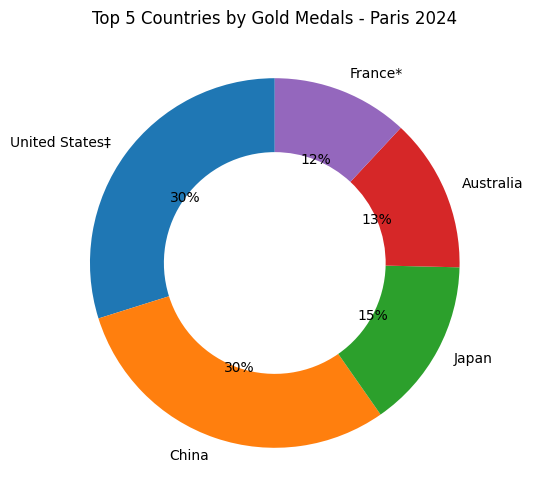

In [15]:
top5_gold = df_new.sort_values(by="Gold", ascending=False).head(5)

fig, ax = plt.subplots(figsize=(6,6))
colors = sns.color_palette("tab10", 5)
wedges, texts, autotexts = ax.pie(
    top5_gold["Gold"],
    labels=top5_gold["NOC"],
    autopct="%1.0f%%",
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4)
)
plt.title("Top 5 Countries by Gold Medals - Paris 2024")
plt.show()

##### Top 5 Countries By Bronze Medal


/tmp/ipython-input-1316714434.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bronze_expanded, x="NOC", y="Bronze", palette="Set2")


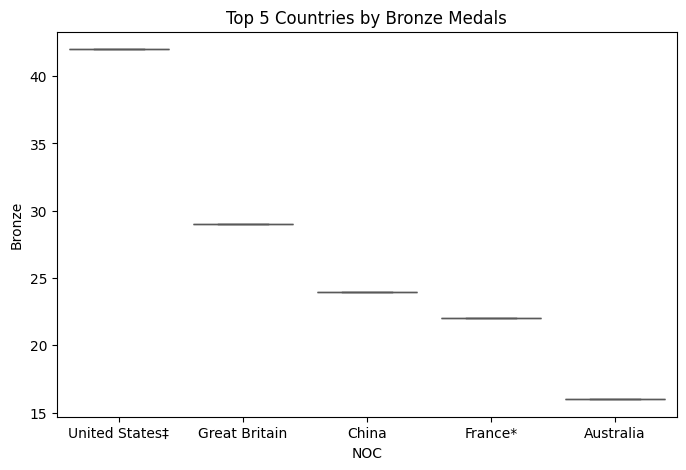

In [17]:
top5_bronze = df_new.sort_values(by="Bronze", ascending=False).head(5)

bronze_expanded = pd.DataFrame({
    "NOC": np.repeat(top5_bronze["NOC"], top5_bronze["Bronze"]),
    "Bronze": np.concatenate([np.repeat(val, val) for val in top5_bronze["Bronze"]])
})
plt.figure(figsize=(8,5))
sns.boxplot(data=bronze_expanded, x="NOC", y="Bronze", palette="Set2")
plt.title("Top 5 Countries by Bronze Medals")
plt.show()

In [18]:
# 5. Mapping
continent_map = {
    "United States": "North America",
    "China": "Asia",
    "Japan": "Asia",
    "Australia": "Oceania",
    "Canada": "North America",
    "Brazil": "South America",
    "Kenya": "Africa",
    "Ethiopia": "Africa",
    "Great Britain": "Europe",
    "France": "Europe",
    "Germany": "Europe",
    "Italy": "Europe",
    "Netherlands": "Europe",
    "South Korea": "Asia",
    "Hungary": "Europe",
    "Cuba": "North America",
    "South Africa": "Africa"
}

In [19]:
df_continent = (
    df_new.assign(Continent=df_new["NOC"].map(continent_map))
    .dropna(subset=["Continent"])
    .groupby("Continent", as_index=False)
    .agg(Total_Medals=("Total", "sum"))
    .sort_values(by="Total_Medals", ascending=False)
)

/tmp/ipython-input-1163161943.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_continent, x="Total_Medals", y="Continent", palette="viridis")


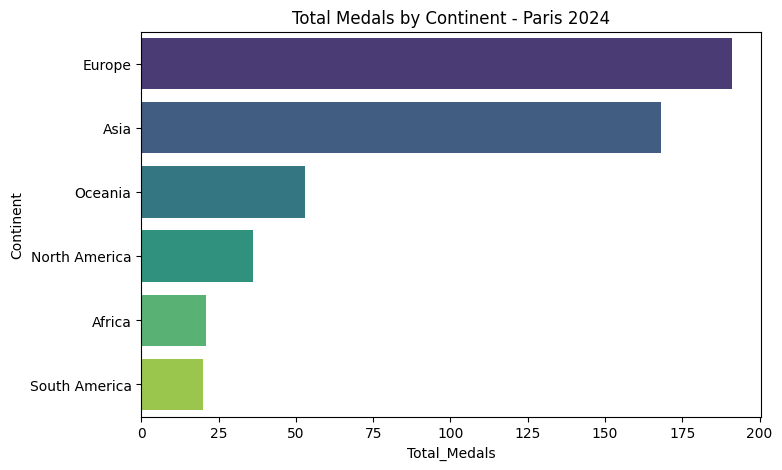

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_continent, x="Total_Medals", y="Continent", palette="viridis")
plt.title("Total Medals by Continent - Paris 2024")
plt.show()

#### Donut chart for top 5 continents

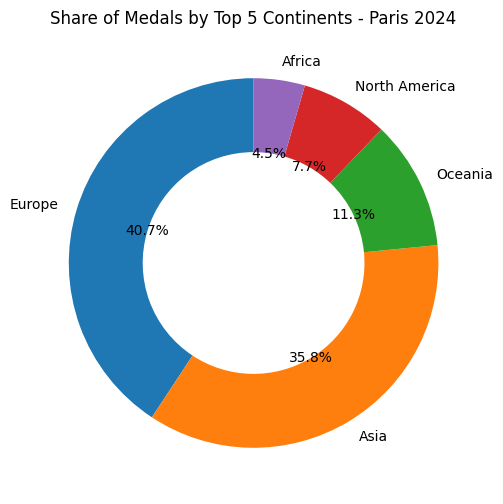

In [21]:

top5_cont = df_continent.head(5)
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(
    top5_cont["Total_Medals"],
    labels=top5_cont["Continent"],
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=0.4)
)
plt.title("Share of Medals by Top 5 Continents - Paris 2024")
plt.show()